In [ ]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.
import kagglehub

# Download latest version
path = kagglehub.dataset_download("zalando-research/fashionmnist")

print("Path to dataset files:", path)

100%|██████████| 68.8M/68.8M [00:01<00:00, 49.3MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/zalando-research/fashionmnist/versions/4


<p style = "font-size : 49px; color : #393e46 ; font-family : 'Comic Sans MS'; text-align : center; background-color : #00adb5; border-radius: 5px 5px;"><strong>Image Classification with ANN</strong></p>

In [ ]:
# necessary imports

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf
from tensorflow import keras

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [ ]:
# loading data
fashion_mnist = tf.keras.datasets.fashion_mnist
# x = data, y = label
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
# shape of data
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((60000, 28, 28), (10000, 28, 28), (60000,), (10000,))

In [ ]:
# data type of dataset
X_train.dtype, X_test.dtype, y_train.dtype, y_test.dtype

(dtype('uint8'), dtype('uint8'), dtype('uint8'), dtype('uint8'))

In [ ]:
# creating validation data snd scaling data to range (0-1)
# x vaild = 4000, x train = 56000.
# /255 to normalize pixels from 0-255 to 0-1
X_valid, X_train = X_train[:4000] / 255, X_train[4000:] / 255
y_valid, y_train = y_train[:4000], y_train[4000:]
X_test = X_test / 255

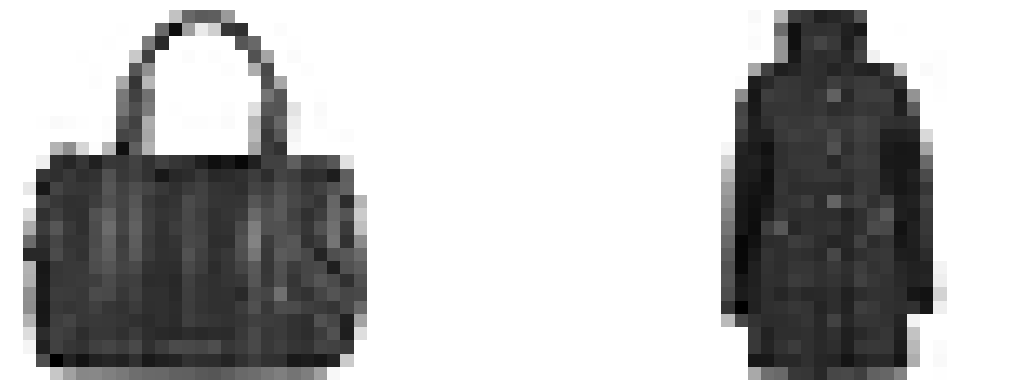

In [ ]:
# looking at first two images
plt.figure(figsize = (15, 4))
plotnumber = 1

for i in range(2):
    if plotnumber <= 2:
        ax = plt.subplot(1, 2, plotnumber)
        plt.imshow(X_train[i], cmap = 'binary')
        plt.axis('off')

    plotnumber += 1

plt.tight_layout()
plt.show()

In [ ]:
# displays the training label
y_train

array([8, 4, 3, ..., 3, 0, 5], dtype=uint8)

In [ ]:
# class names corresponding to values 0-9
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [ ]:
# checking first 2 train data's label
class_names[y_train[0]], class_names[y_train[1]]

('Bag', 'Coat')

<p style = "font-size : 25px; color : #34656d ; font-family : 'Comic Sans MS'; "><strong>The validation set contains 4,000 images, and the test set contains 10,000 images:</strong></p>

In [ ]:
# checking validation data shape
X_valid.shape

(4000, 28, 28)

In [ ]:
# checking testing data shape
X_test.shape

(10000, 28, 28)

<p style = "font-size : 40px; color : #34656d ; font-family : 'Comic Sans MS'; "><strong>Let’s take a look at a sample of the images in the dataset:</strong></p>

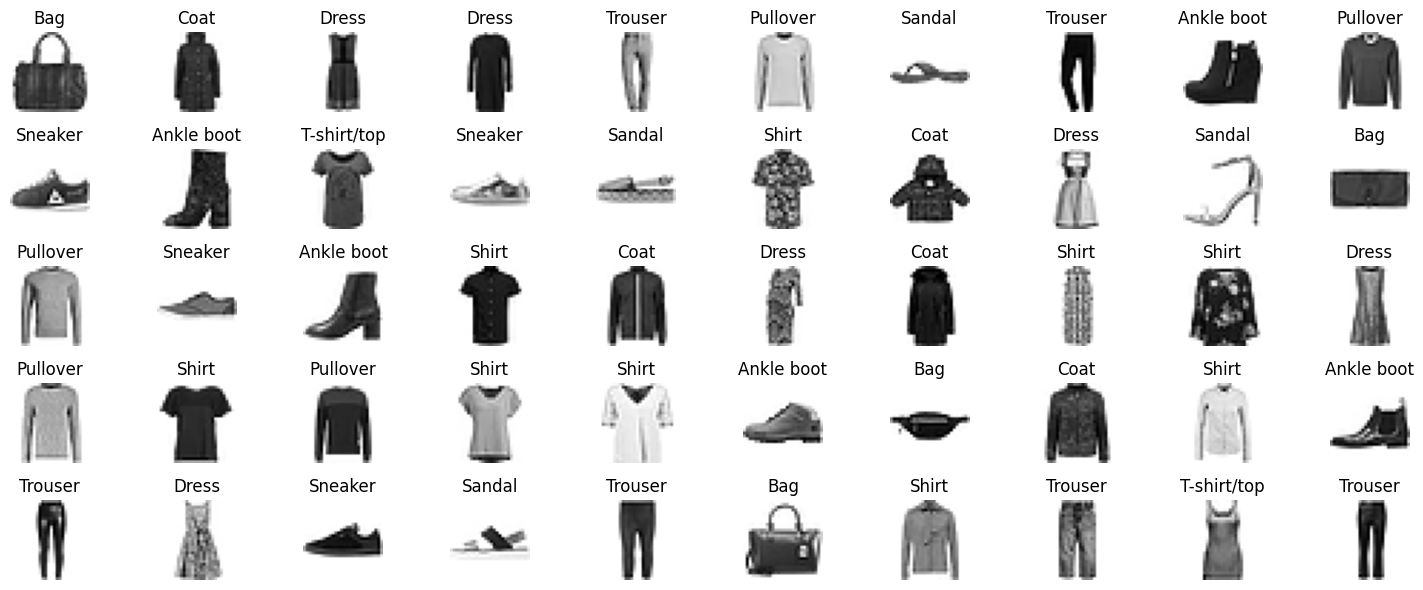

In [ ]:
# checking some of the training dataset
plt.figure(figsize = (15, 6))
plotnumber = 1

for i in range(51):
    if plotnumber <= 50:
        ax = plt.subplot(5, 10, plotnumber)
        plt.imshow(X_train[i], cmap = 'binary')
        plt.axis('off')
        plt.title(class_names[y_train[i]], fontdict = {'fontsize'  : 12, 'color' : 'black'})

    plotnumber += 1

plt.tight_layout()
plt.show()

<p style = "font-size : 45px; color : #34656d ; font-family : 'Comic Sans MS'; text-align : center; background-color : #f9b208; border-radius: 5px 5px;"><strong>Model Building</strong></p>

In [ ]:
from tensorflow import keras

# Regularization strength (L2 penalty)
l2_reg = keras.regularizers.l2(0.001)

# Building sequential model with Dropout, Batch Normalization, and L2 Regularization
model = keras.models.Sequential([
    # Flatten the 28x28 input into a 1D array
    keras.layers.Flatten(input_shape=[28, 28]),

    keras.layers.Dense(100),
    keras.layers.BatchNormalization(),
    keras.layers.Activation('relu'),

    keras.layers.Dense(70),
    keras.layers.BatchNormalization(),
    keras.layers.Activation('relu'),

    keras.layers.Dense(50),
    keras.layers.BatchNormalization(),
    keras.layers.Activation('relu'),

    keras.layers.Dense(30),
    keras.layers.BatchNormalization(),
    keras.layers.Activation('relu'),

    # Output layer with 10 neurons for classification (softmax for probability distribution)
    keras.layers.Dense(10, activation='softmax')
])


In [ ]:
# summary of model
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 100)                 │          78,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 100)                 │             400 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation (Activation)              │ (None, 100)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 70)                  │           7,070 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 70)                  │             280 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_1 (Activation)            │ (None, 70)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 50)                  │           3,550 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 50)                  │             200 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_2 (Activation)            │ (None, 50)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 30)                  │           1,530 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 30)                  │             120 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_3 (Activation)            │ (None, 30)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 10)                  │             310 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 91,960 (359.22 KB)

 Trainable params: 91,460 (357.27 KB)

 Non-trainable params: 500 (1.95 KB)

<p style = "font-size : 34px; color : #fed049 ; font-family : 'Comic Sans MS'; text-align : center; background-color : #007580; border-radius: 5px 5px;"><strong>Compiling the Image Classification Model</strong></p>

In [ ]:
# compiling model
model.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy(),
              optimizer = tf.keras.optimizers.Adam(), metrics = ['accuracy'])

<p style = "font-size : 34px; color : #fed049 ; font-family : 'Comic Sans MS'; text-align : center; background-color : #007580; border-radius: 5px 5px;"><strong>Training and Evaluating the Image Classification Model</strong></p>

In [ ]:
# fitting model
# trains the data for 50 epochs using x train and y train, and x valid, y valid to monitor performance
model_history = model.fit(X_train, y_train, validation_data = (X_valid, y_valid), epochs = 50)
print(model_history.history['loss'])
print(model_history.history['accuracy'])

Epoch 1/50
1625/1625 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.7565 - loss: 0.7677 - val_accuracy: 0.6435 - val_loss: 1.0095
Epoch 2/50
1625/1625 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.8594 - loss: 0.3928 - val_accuracy: 0.7442 - val_loss: 0.6806
Epoch 3/50
1625/1625 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.8691 - loss: 0.3602 - val_accuracy: 0.7905 - val_loss: 0.5706
Epoch 4/50
1625/1625 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.8805 - loss: 0.3281 - val_accuracy: 0.8550 - val_loss: 0.4279
Epoch 5/50
1625/1625 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8856 - loss: 0.3130 - val_accuracy: 0.8285 - val_loss: 0.4813
Epoch 6/50
1625/1625 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.8913 - loss: 0.2948 - val_accuracy: 0.8155 - val_loss: 0.4717
Epoch 7/50
1625/1625 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.8958 - loss: 0.2769 - val_accuracy: 0.8008 - val_loss: 0.5136
Epoch 8/50
1625/1625 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8993 - loss: 0.2684 

In [ ]:
# evaluating model
# outputs loss, accuracy
model.evaluate(X_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8474 - loss: 0.6441


[0.6379580497741699, 0.8492000102996826]

<p style = "font-size : 34px; color : #fed049 ; font-family : 'Comic Sans MS'; text-align : center; background-color : #007580; border-radius: 5px 5px;"><strong>Visualizing model</strong></p>

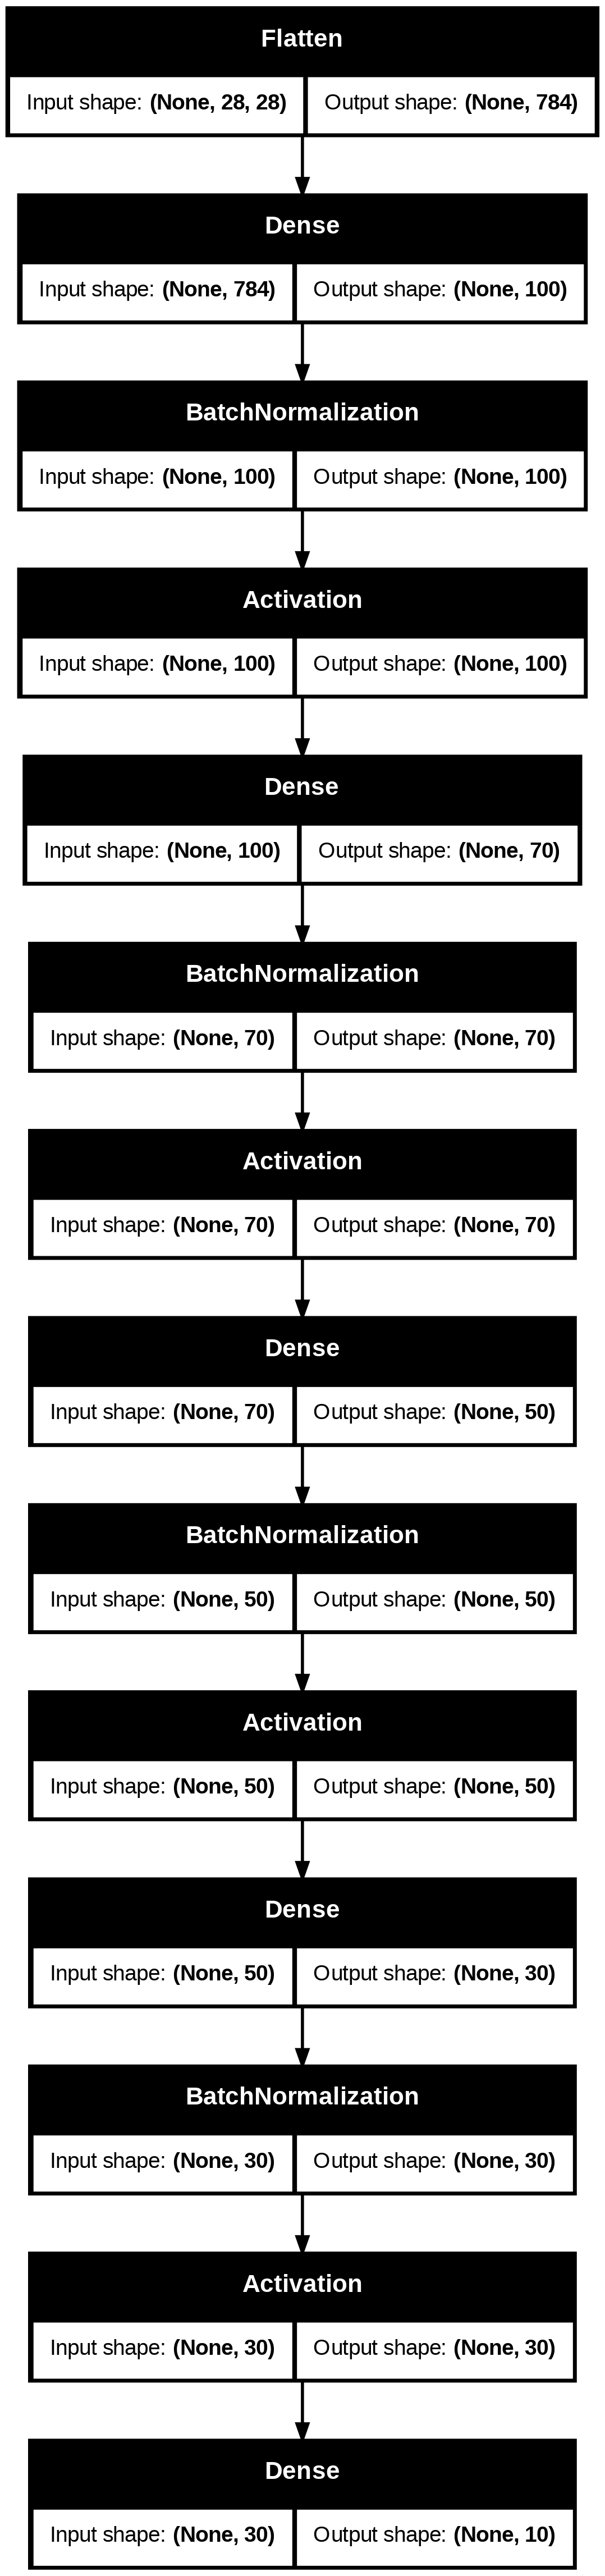

In [ ]:
# creates a visualization of model
from tensorflow.keras.utils import plot_model

plot_model(model, show_shapes = True)

<p style = "font-size : 34px; color : #fed049 ; font-family : 'Comic Sans MS'; text-align : center; background-color : #007580; border-radius: 5px 5px;"><strong>Visualizing Training and Validation Loss</strong></p>

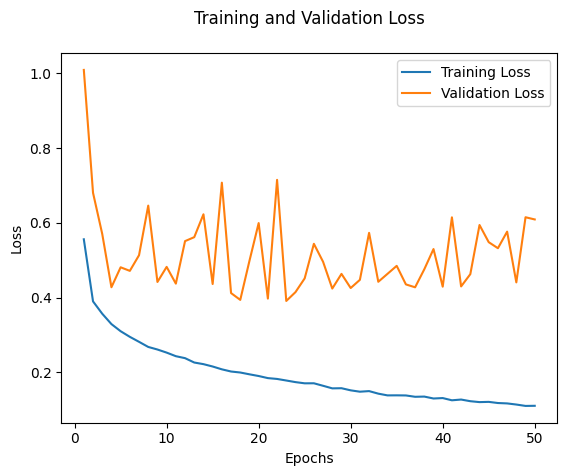

In [ ]:
# plotting training and validation loss
import seaborn as sns
import matplotlib.pyplot as plt

# Extract loss history
train_loss = model_history.history['loss']
val_loss = model_history.history['val_loss']
epoch = range(1, 51)

# Plot training and validation loss
sns.lineplot(x=epoch, y=train_loss, label='Training Loss')
sns.lineplot(x=epoch, y=val_loss, label='Validation Loss')
plt.title('Training and Validation Loss\n')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


<p style = "font-size : 34px; color : #fed049 ; font-family : 'Comic Sans MS'; text-align : center; background-color : #007580; border-radius: 5px 5px;"><strong>Visualizing Training and Validation accuracy</strong></p>

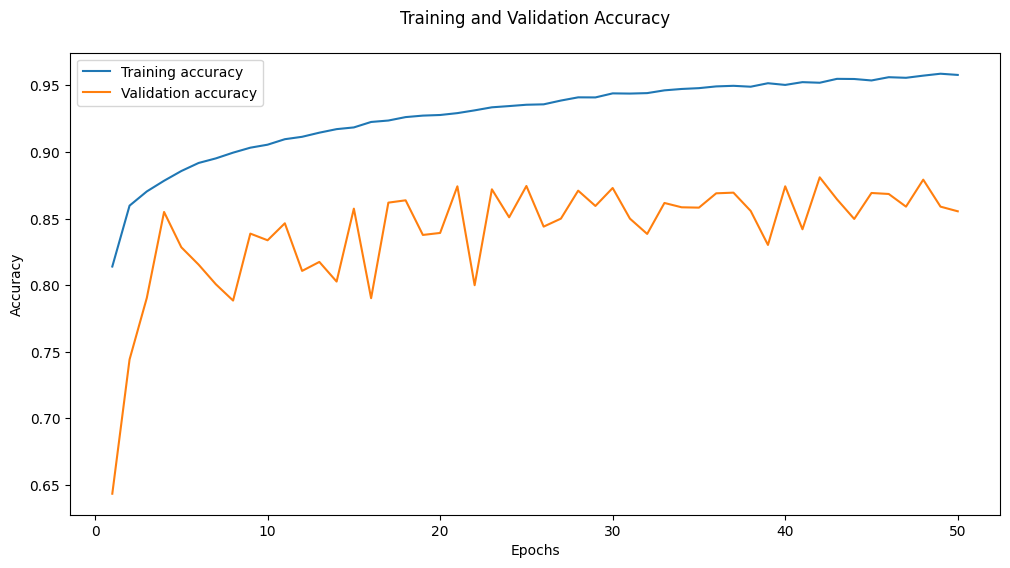

In [ ]:
# plotting training and validation accuracy
plt.figure(figsize = (12, 6))

train_loss = model_history.history['accuracy']
val_loss = model_history.history['val_accuracy']
epoch = range(1, 51)
sns.lineplot(x=epoch, y=train_loss, label = 'Training accuracy')
sns.lineplot(x=epoch, y=val_loss, label = 'Validation accuracy')
plt.title('Training and Validation Accuracy\n')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc = 'best')
plt.show()

In [ ]:
# making predictions===========================================
y_probs = model.predict(X_test)
y_preds = y_probs.argmax(axis = 1)

y_preds[:100]

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


array([9, 2, 1, 1, 0, 1, 4, 4, 5, 7, 4, 5, 5, 3, 2, 1, 2, 2, 8, 0, 2, 5,
       7, 5, 1, 2, 6, 0, 9, 4, 8, 8, 3, 3, 8, 0, 7, 5, 7, 9, 0, 1, 6, 7,
       6, 7, 2, 1, 6, 2, 4, 2, 5, 8, 2, 2, 8, 6, 8, 0, 7, 7, 8, 5, 1, 1,
       2, 4, 7, 8, 7, 0, 2, 6, 2, 3, 1, 2, 8, 4, 3, 8, 5, 9, 5, 0, 3, 2,
       0, 2, 5, 3, 2, 7, 1, 8, 0, 1, 2, 2])

In [ ]:
# function for confusion matrix

import itertools
from sklearn.metrics import confusion_matrix

# Our function needs a different name to sklearn's plot_confusion_matrix
def make_confusion_matrix(y_true, y_pred, classes=None, figsize=(10, 10), text_size=15):
  # Create the confustion matrix
  cm = confusion_matrix(y_true, y_pred)
  cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] # normalize it
  n_classes = cm.shape[0] # find the number of classes we're dealing with

  # Plot the figure and make it pretty
  fig, ax = plt.subplots(figsize=figsize)
  cax = ax.matshow(cm, cmap=plt.cm.Blues) # colors will represent how 'correct' a class is, darker == better
  fig.colorbar(cax)

  # Are there a list of classes?
  if classes:
    labels = classes
  else:
    labels = np.arange(cm.shape[0])

  # Label the axes
  ax.set(title="Confusion Matrix",
         xlabel="Predicted label",
         ylabel="True label",
         xticks=np.arange(n_classes), # create enough axis slots for each class
         yticks=np.arange(n_classes),
         xticklabels=labels, # axes will labeled with class names (if they exist) or ints
         yticklabels=labels)

  # Make x-axis labels appear on bottom
  ax.xaxis.set_label_position("bottom")
  ax.xaxis.tick_bottom()

  # Set the threshold for different colors
  threshold = (cm.max() + cm.min()) / 2.

  # Plot the text on each cell
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
             horizontalalignment="center",
             color="white" if cm[i, j] > threshold else "black",
             size=text_size)

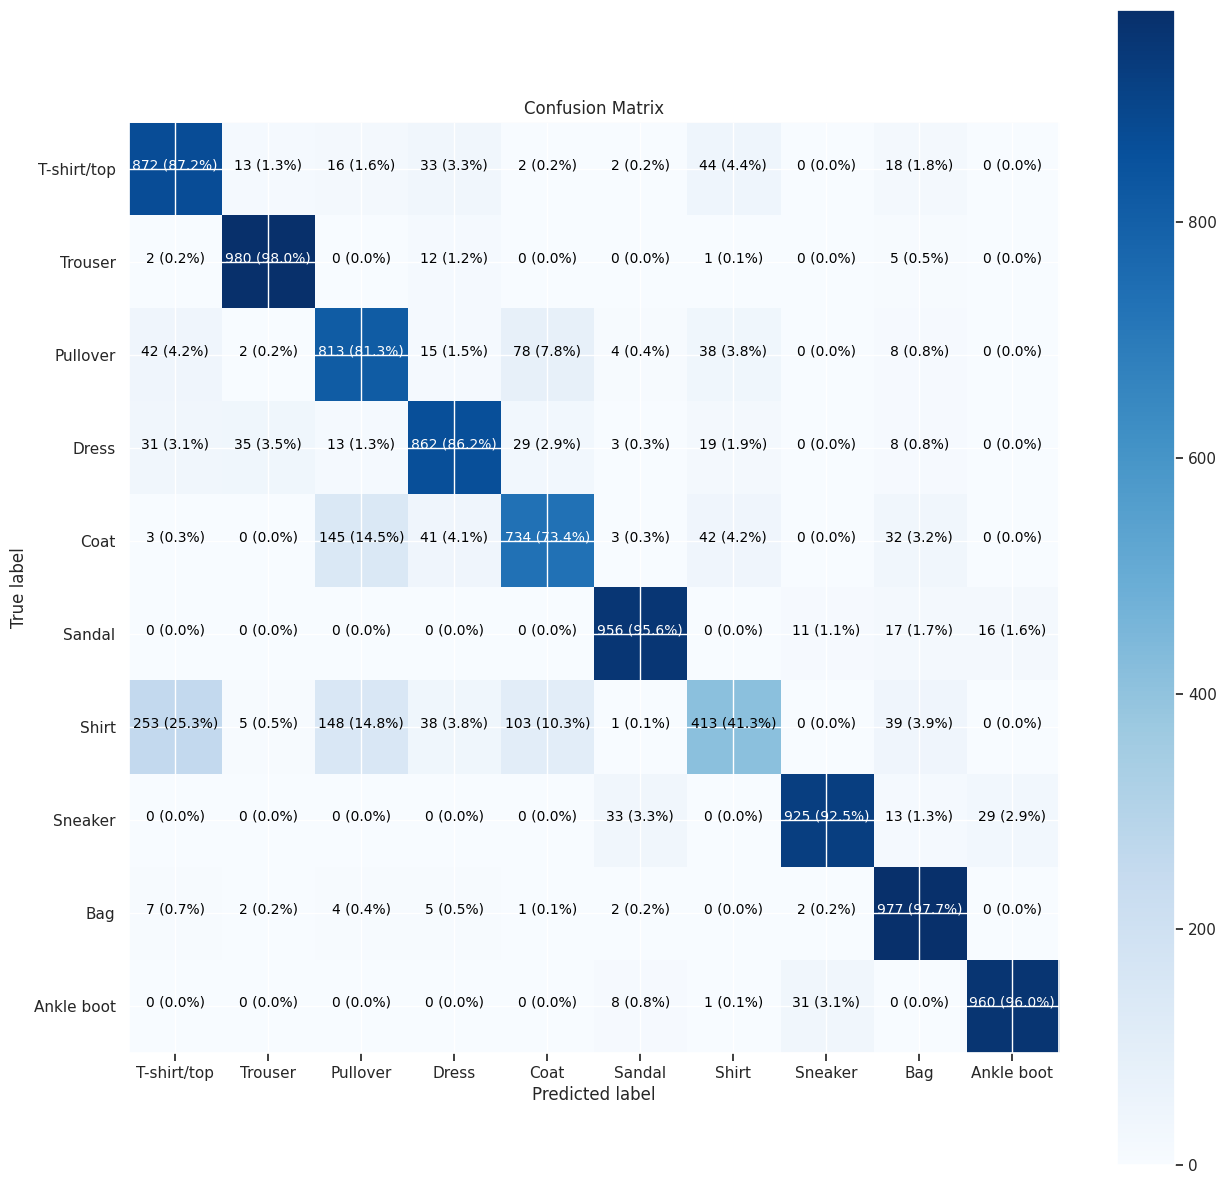

In [ ]:
# plotting the confusion matrix
import seaborn as sns
sns.set_theme(style="darkgrid")  # Equivalent to seaborn-dark
make_confusion_matrix(y_true=y_test,
                      y_pred=y_preds,
                      classes=class_names,
                      figsize=(15, 15),
                      text_size=10)

In [ ]:
import random

# Create a function for plotting a random image along with its prediction
def plot_random_image(model, images, true_labels, classes):
  # Setup random integer
  i = random.randint(0, len(images))

  # Create predictions and targets
  target_image = images[i]
  pred_probs = model.predict(target_image.reshape(1, 28, 28)) # have to reshape to get into right size for model
  pred_label = classes[pred_probs.argmax()]
  true_label = classes[true_labels[i]]

  # Plot the target image
  plt.imshow(target_image, cmap=plt.cm.binary)

  # Change the color of the titles depending on if the prediction is right or wrong
  if pred_label == true_label:
    color = "green"
  else:
    color = "red"

  # Add xlabel information (prediction/true label)
  plt.xlabel("Pred: {} {:2.0f}% (True: {})".format(pred_label,
                                                   100*tf.reduce_max(pred_probs),
                                                   true_label),
             color=color) # set the color to green or red

<p style = "font-size : 34px; color : #fed049 ; font-family : 'Comic Sans MS'; text-align : center; background-color : #007580; border-radius: 5px 5px;"><strong>Looking at some Random Predictions</strong></p>

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


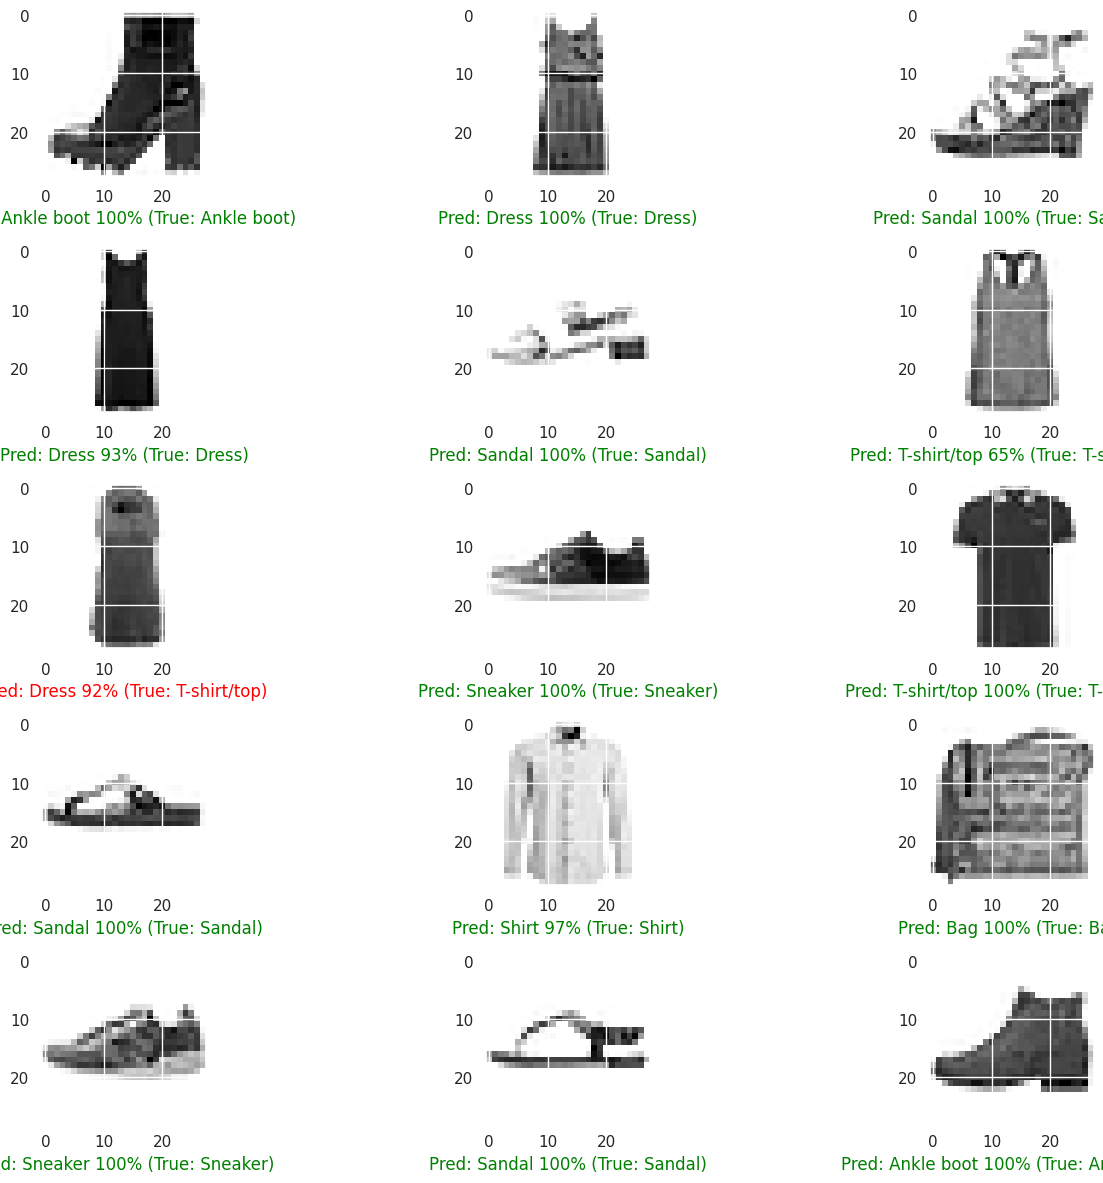

In [ ]:
# random image predictions
plt.figure(figsize = (15, 12))
plotnumber = 1

for i in range(15):
    if plotnumber <= 15:
        ax = plt.subplot(5, 3, plotnumber)
        plot_random_image(model=model,
                  images=X_test,
                  true_labels=y_test,
                  classes=class_names)

    plotnumber += 1

plt.tight_layout()
plt.show()